<a href="https://colab.research.google.com/github/priyarameshd/NueralNetwork/blob/main/NN_fireforest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS


In [ ]:
from pandas import read_csv
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
import random as rn
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [ ]:
os.environ['PYTHONHASHSEED'] = '0'
np.random.seed(37)
rn.seed(1254)
tf.random.set_seed(89)

In [ ]:
filename = "fire_forest.csv"
df_forest = read_csv(filename)

In [ ]:
df_forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [ ]:
df_forest.head(2)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small


In [ ]:
df_forest.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [ ]:
df_forest.describe().T

,count,mean,std,min,25%,50%,75%,max
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40
area,517.0,12.847292,63.655818,0.0,0.0,0.52,6.57,1090.84
dayfri,517.0,0.164410,0.371006,0.0,0.0,0.00,0.00,1.00


In [ ]:
col_names_categ = df_forest.select_dtypes(include=['object']).columns.tolist()

In [ ]:
label_encoder = preprocessing.LabelEncoder()
for colname in col_names_categ:
    df_forest[colname] = label_encoder.fit_transform(df_forest[colname])

In [ ]:
df1 = df_forest.drop(['month','day','dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep'], axis=1)
df1.head(2)

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1


In [ ]:
df1.corr()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122,-0.022063
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994,-0.034715
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383,-0.019428
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258,0.008726
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844,-0.006021
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519,0.045243
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317,-0.059113
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366,-0.050001
area,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000,-0.311322
size_category,-0.022063,-0.034715,-0.019428,0.008726,-0.006021,0.045243,-0.059113,-0.050001,-0.311322,1.000000


In [ ]:
corr = pd.DataFrame(data = df1.corr().iloc[:,-1], index=df1.columns)
corr

,size_category
FFMC,-0.022063
DMC,-0.034715
DC,-0.019428
ISI,0.008726
temp,-0.006021
RH,0.045243
wind,-0.059113
rain,-0.050001
area,-0.311322
size_category,1.000000


Text(0.5, 1.01, 'Correlation plot of Target variable with other continuous features')

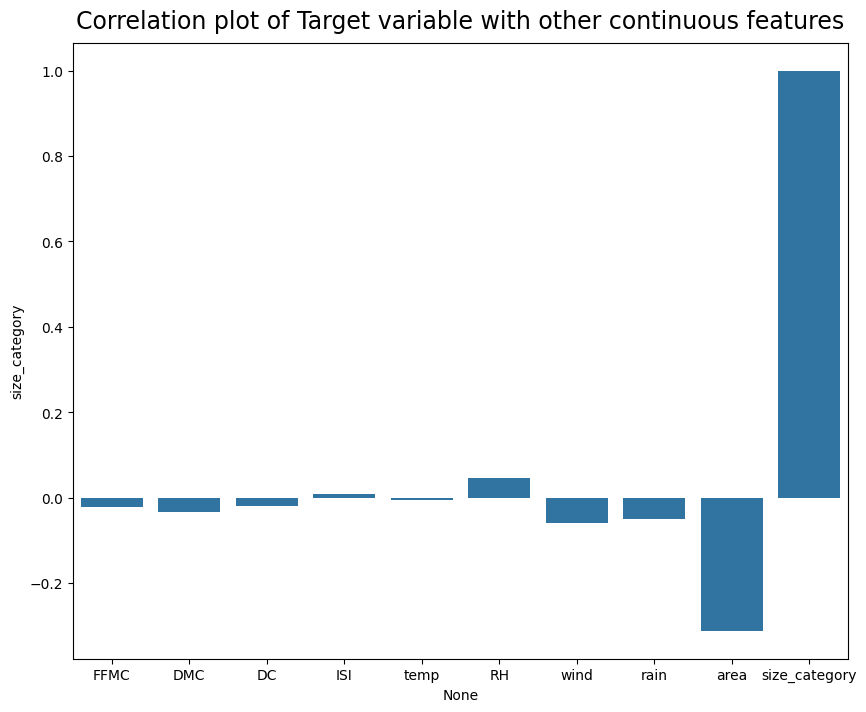

In [ ]:
fig , ax=plt.subplots(figsize=(10,8))
sns.barplot(x = corr.index, y = corr.iloc[:,0])
plt.title('Correlation plot of Target variable with other continuous features', fontsize=17, y =1.01)

Area has the highest correlation then wind.

Text(0.5, 1.01, 'Pairplot for all numerical variables')

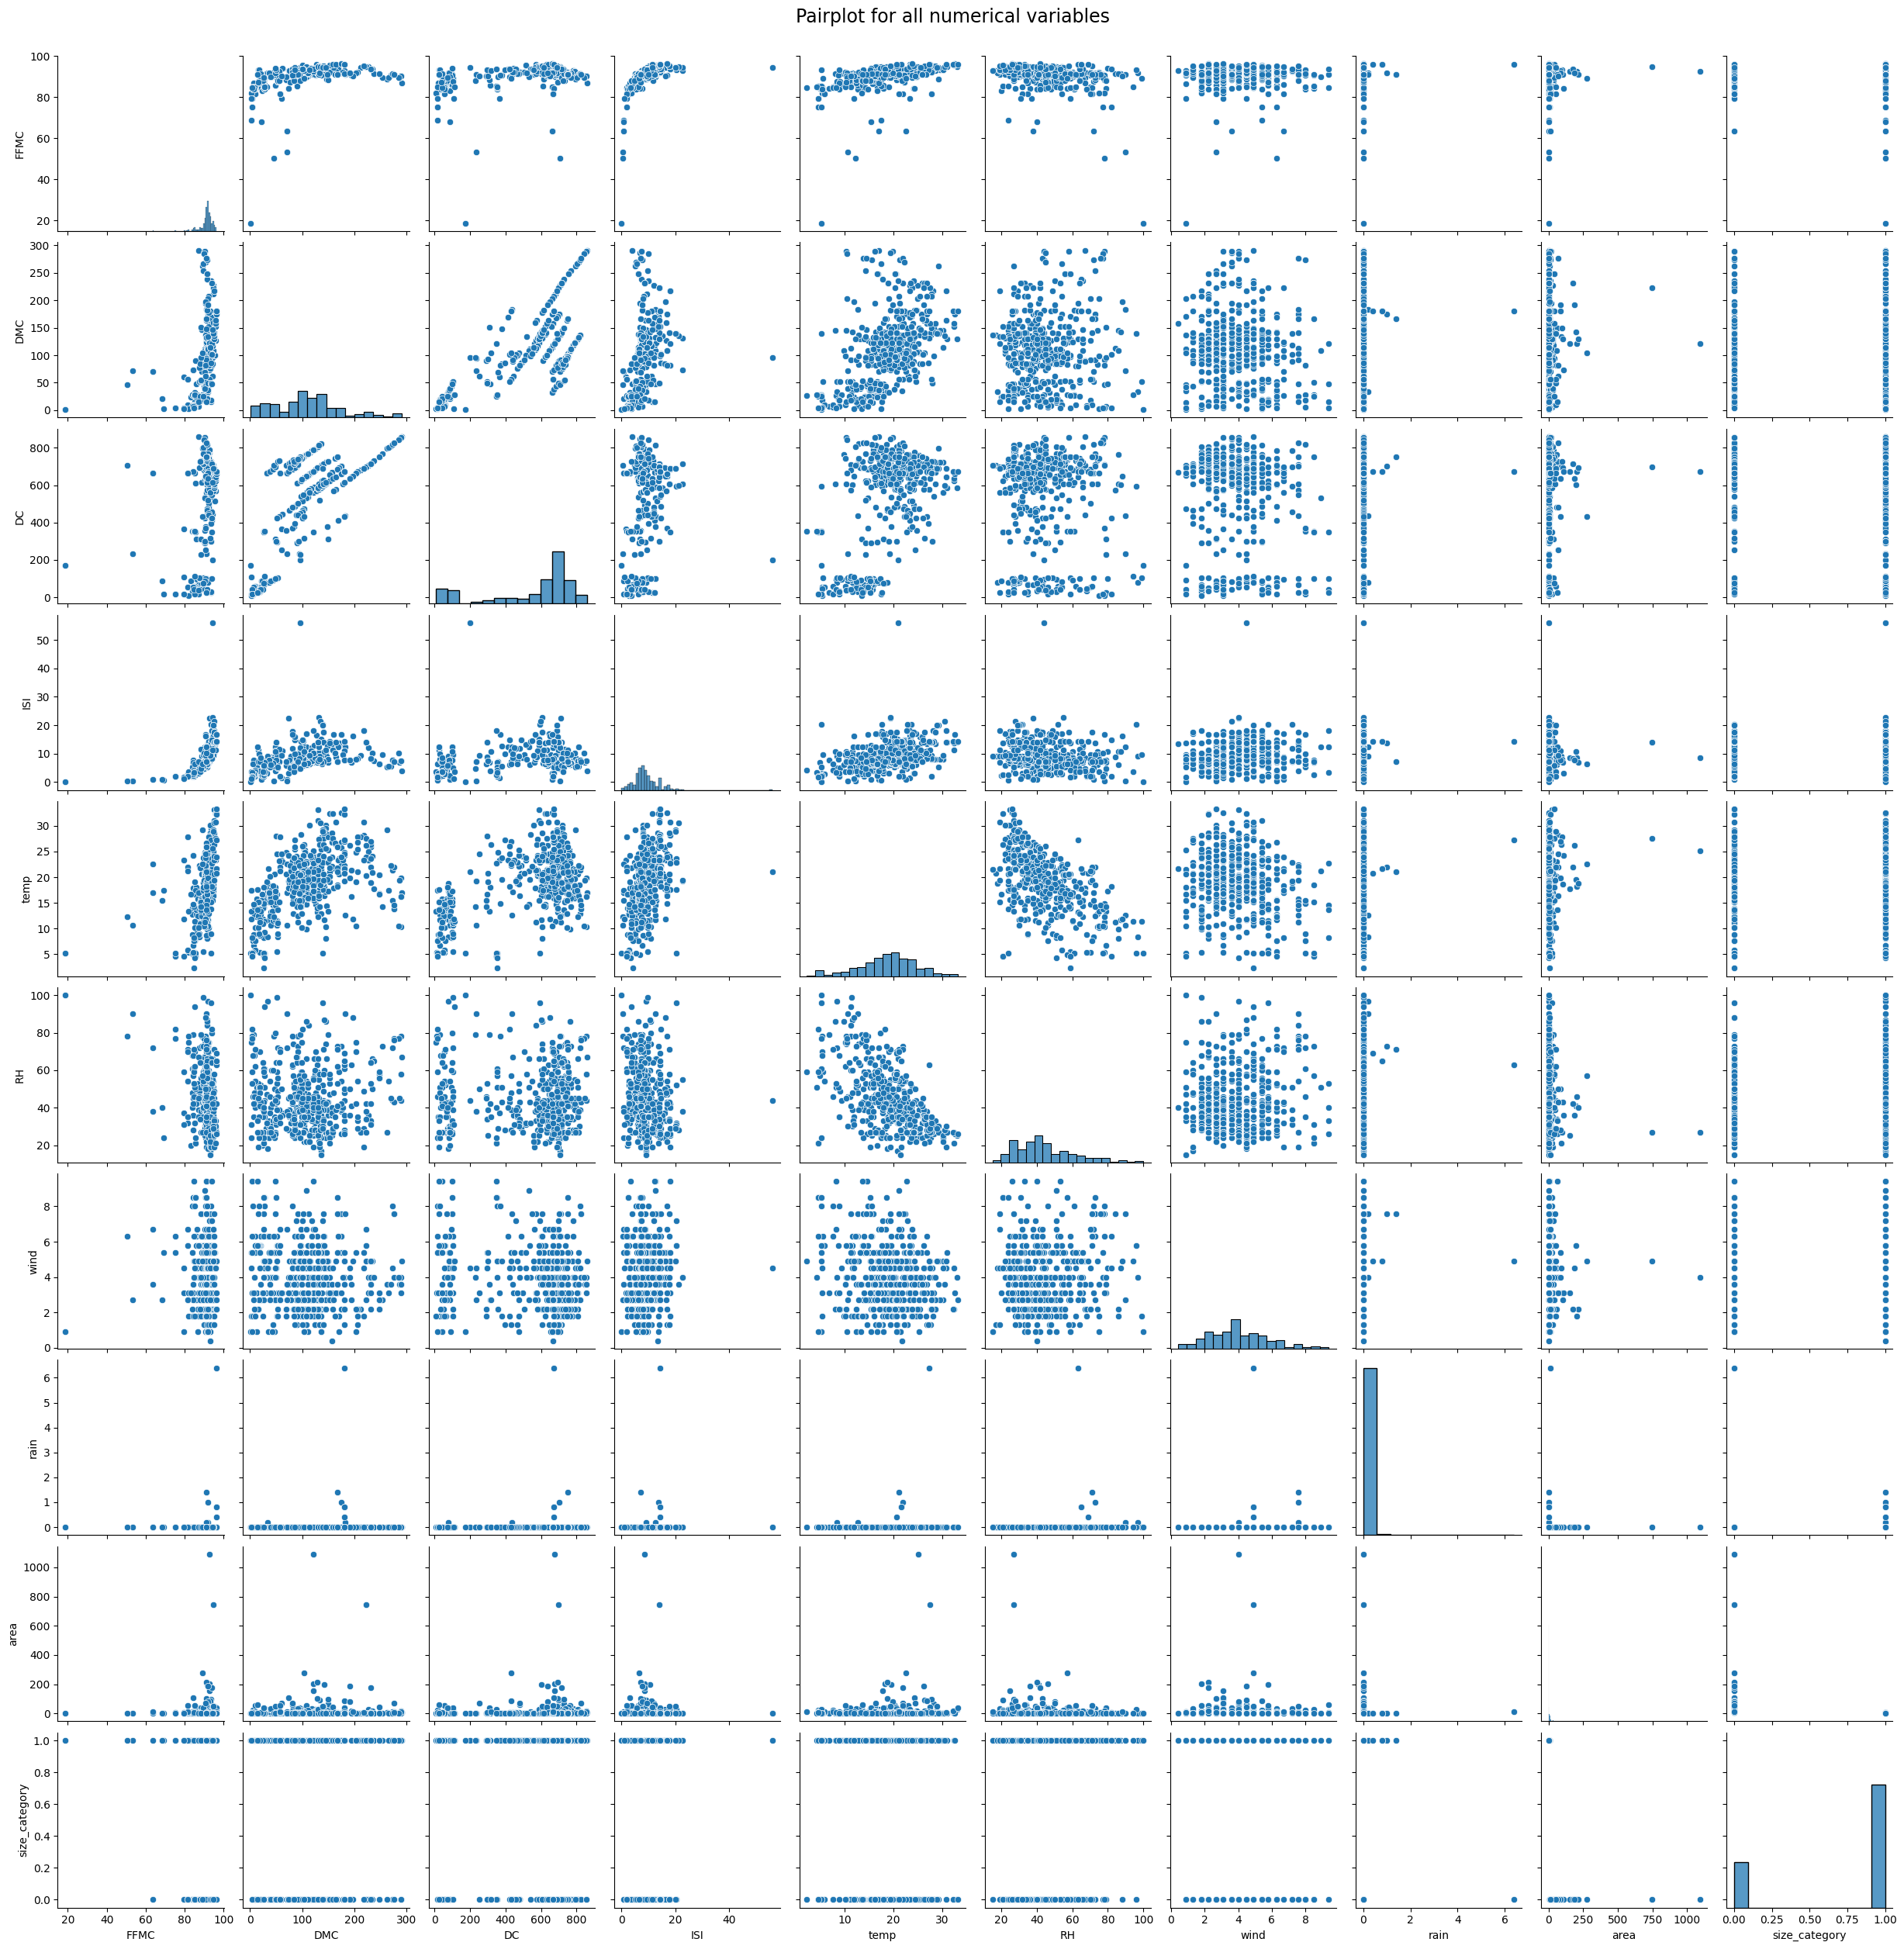

In [ ]:
sns.pairplot(df1)
plt.suptitle("Pairplot for all numerical variables", y = 1.01, fontsize=17)

In [ ]:
df_forest.drop(columns=['month','day'],inplace=True)

In [ ]:
ar_fireforest = df_forest.values

In [ ]:

x = df_forest.drop('size_category', axis=1)
y = df_forest['size_category']

In [ ]:
y.head(2)

0    1
1    1
Name: size_category, dtype: int64

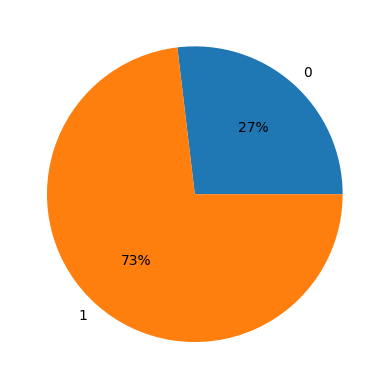

In [ ]:
unique, counts = np.unique(y, return_counts=True)
plt.pie(counts, labels=unique, autopct='%.0f%%');

In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import pandas as pd
#Standardize & Normalize the data
norm = MinMaxScaler()
std = StandardScaler()

x_norm = pd.DataFrame(norm.fit_transform(x), columns=x.columns)            #data between -3 to +3
x_std = pd.DataFrame(std.fit_transform(x), columns=x.columns)

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size=0.25)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((387, 28), (130, 28), (387,), (130,))

### Hyper parameter tuning

In [ ]:
!pip install keras==2.12.0
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam

Batch Size and Epochs

In [ ]:
# create model
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=28, kernel_initializer='random_uniform', activation='relu'))
    model.add(Dense(8, kernel_initializer='random_uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='random_uniform', activation='sigmoid'))

    adam=Adam(learning_rate = 0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [ ]:
# Create the model
model = KerasClassifier(build_fn = create_model,verbose = 0)
# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END .....batch_size=10, epochs=10;, score=0.859 total time=   7.1s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................
[CV 2/5; 1/9] END .....batch_size=10, epochs=10;, score=0.936 total time=   4.5s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................
[CV 3/5; 1/9] END .....batch_size=10, epochs=10;, score=0.922 total time=   3.5s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................
[CV 4/5; 1/9] END .....batch_size=10, epochs=10;, score=0.896 total time=   3.7s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................
[CV 5/5; 1/9] END .....batch_size=10, epochs=10;, score=0.883 total time=   4.6s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................
[CV 1/5; 2/9] END .....batch_size=10, epochs=50;,

[CV 3/5; 7/9] END .....batch_size=40, epochs=10;, score=0.779 total time=   1.2s
[CV 4/5; 7/9] START batch_size=40, epochs=10....................................


[CV 4/5; 7/9] END .....batch_size=40, epochs=10;, score=0.818 total time=   1.4s
[CV 5/5; 7/9] START batch_size=40, epochs=10....................................
[CV 5/5; 7/9] END .....batch_size=40, epochs=10;, score=0.701 total time=   1.2s
[CV 1/5; 8/9] START batch_size=40, epochs=50....................................
[CV 1/5; 8/9] END .....batch_size=40, epochs=50;, score=0.885 total time=   1.9s
[CV 2/5; 8/9] START batch_size=40, epochs=50....................................
[CV 2/5; 8/9] END .....batch_size=40, epochs=50;, score=0.936 total time=   2.5s
[CV 3/5; 8/9] START batch_size=40, epochs=50....................................
[CV 3/5; 8/9] END .....batch_size=40, epochs=50;, score=0.883 total time=   2.6s
[CV 4/5; 8/9] START batch_size=40, epochs=50....................................
[CV 4/5; 8/9] END .....batch_size=40, epochs=50;, score=0.896 total time=   2.4s
[CV 5/5; 8/9] START batch_size=40, epochs=50....................................
[CV 5/5; 8/9] END .....batch

In [ ]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9120213031768799, using {'batch_size': 10, 'epochs': 50}
0.8992340922355652,0.027409661947125703 with: {'batch_size': 10, 'epochs': 10}
0.9120213031768799,0.03339588645206709 with: {'batch_size': 10, 'epochs': 50}
0.9017649173736573,0.026594197074915314 with: {'batch_size': 10, 'epochs': 100}
0.8785214781761169,0.019434381705032665 with: {'batch_size': 20, 'epochs': 10}
0.9017648935317993,0.027987673666103424 with: {'batch_size': 20, 'epochs': 50}
0.9016982913017273,0.03267385009616644 with: {'batch_size': 20, 'epochs': 100}
0.7623043537139893,0.04991857652058174 with: {'batch_size': 40, 'epochs': 10}
0.8965700984001159,0.020257085325084922 with: {'batch_size': 40, 'epochs': 50}
0.8965367913246155,0.029838300242312838 with: {'batch_size': 40, 'epochs': 100}


Learning rate and Drop out rate

In [ ]:
from keras.layers import Dropout

# Defining the model

def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(12,input_dim = 28,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(8,input_dim = 28,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))

    adam = Adam(learning_rate = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 100)

# Define the grid search parameters

learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_train,y_train)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.885 total time=   4.7s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.885 total time=   2.8s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.870 total time=   3.8s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.896 total time=   4.1s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.896 total time=   2.7s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................
[CV 1/5; 

In [ ]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9120879173278809, using {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.8863136887550354,0.009585211400465267 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.8889776945114136,0.0248442254603668 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.8914085984230041,0.04737160627322782 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.8681984782218933,0.025128095544001014 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.9120879173278809,0.022380984147676006 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.8940059900283813,0.04756424535224011 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.8862137913703918,0.021098559085334954 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.9042957186698913,0.025603889801832785 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.9019313931465149,0.030718431778805087 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


Aactivation function and Kernel Initializer

In [ ]:
def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(12,input_dim = 28,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.2))
    model.add(Dense(8,input_dim = 28,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation = 'sigmoid'))

    adam = Adam(learning_rate = 0.1)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 100)

# Define the grid search parameters
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,init = init)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_train,y_train)



Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 1/5; 1/12] END activation_function=softmax, init=uniform;, score=0.846 total time=   7.6s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 2/5; 1/12] END activation_function=softmax, init=uniform;, score=0.885 total time=   3.9s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 3/5; 1/12] END activation_function=softmax, init=uniform;, score=0.844 total time=   4.0s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 4/5; 1/12] END activation_function=softmax, init=uniform;, score=0.922 total time=   3.8s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 5/5; 1/12] END activation_function=softmax, init=uniform;, score=0.831 total time=   3.3s
[CV 1/5; 2/12] START activation_function=softmax, init=normal...

In [ ]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9430569410324097, using {'activation_function': 'linear', 'init': 'normal'}
0.8656343579292297,0.0333911372953931 with: {'activation_function': 'softmax', 'init': 'uniform'}
0.8604062676429749,0.025333779547115038 with: {'activation_function': 'softmax', 'init': 'normal'}
0.8295371294021606,0.04075962094785941 with: {'activation_function': 'softmax', 'init': 'zero'}
0.8552114486694335,0.03355788030145972 with: {'activation_function': 'relu', 'init': 'uniform'}
0.8706293702125549,0.03009961727007089 with: {'activation_function': 'relu', 'init': 'normal'}
0.7390276432037354,0.03194332249914374 with: {'activation_function': 'relu', 'init': 'zero'}
0.9302364110946655,0.013068733628285775 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.9147186160087586,0.02881681126292622 with: {'activation_function': 'tanh', 'init': 'normal'}
0.7390276432037354,0.03194332249914374 with: {'activation_function': 'tanh', 'init': 'zero'}
0.940626037120819,0.023904124363569132 with: {'activa

In [ ]:
grid_result.best_params_

{'activation_function': 'linear', 'init': 'normal'}

Number of nuerons in activation layer

In [ ]:
def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 28,kernel_initializer = 'normal',activation = 'linear'))
    model.add(Dropout(0.2))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'normal',activation = 'linear'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation = 'sigmoid'))

    adam = Adam(learning_rate = 0.1)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 100)

# Define the grid search parameters

neuron1 = [4,8,16]
neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_train,y_train)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 1/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.923 total time=   2.8s
[CV 2/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 2/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.987 total time=   3.7s
[CV 3/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 3/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.922 total time=   3.6s
[CV 4/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 4/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.961 total time=   3.7s
[CV 5/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 5/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.922 total time=   3.7s
[CV 1/5; 2/9] START neuron1=4, neuron2=4........................................
[CV 1/5; 2/9] END .........neuron1=4, neuron2=4;,

In [ ]:
grid_result.best_params_

{'neuron1': 16, 'neuron2': 2}

In [ ]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.945787537097931, using {'neuron1': 16, 'neuron2': 2}
0.9430902242660523,0.026644268670537857 with: {'neuron1': 4, 'neuron2': 2}
0.9404595375061036,0.025579447466280974 with: {'neuron1': 4, 'neuron2': 4}
0.9404928326606751,0.024217971675080146 with: {'neuron1': 4, 'neuron2': 8}
0.9456543326377869,0.03522452747580331 with: {'neuron1': 8, 'neuron2': 2}
0.9404595255851745,0.033487402988111696 with: {'neuron1': 8, 'neuron2': 4}
0.9431235313415527,0.02100638773098814 with: {'neuron1': 8, 'neuron2': 8}
0.945787537097931,0.016981578677265328 with: {'neuron1': 16, 'neuron2': 2}
0.9354312300682068,0.028304709099966973 with: {'neuron1': 16, 'neuron2': 4}
0.9329004287719727,0.03775641271987421 with: {'neuron1': 16, 'neuron2': 8}


Training the model

In [ ]:
from sklearn.metrics import classification_report, accuracy_score


def create_model():
    model = Sequential()
    model.add(Dense(16,input_dim = 28,kernel_initializer = 'normal',activation = 'linear'))
    model.add(Dropout(0.2))
    model.add(Dense(2,input_dim = 28,kernel_initializer = 'normal',activation = 'linear'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation = 'sigmoid'))

    adam = Adam(learning_rate = 0.1)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 100)

# Fitting the model

model.fit(x_train,y_train)

# Predicting using trained model

y_predict = model.predict(x_train)

# Printing the metrics
print(accuracy_score(y_train,y_predict))

13/13 [==============================] - 0s 4ms/step
0.9922480620155039


In [ ]:
y_predict_test = model.predict(x_test)
# Printing the metrics
print(accuracy_score(y_test,y_predict_test))

5/5 [==============================] - 0s 3ms/step
0.9384615384615385


Visualization

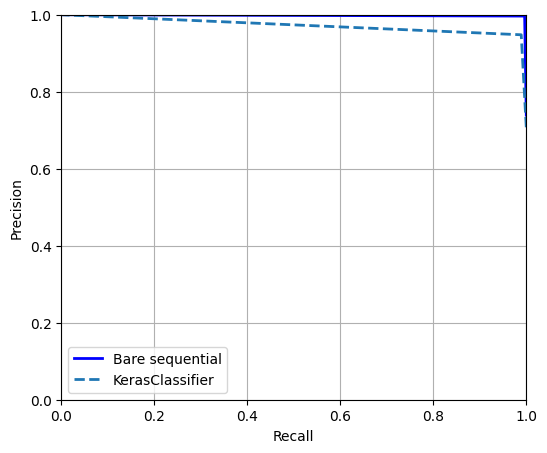

In [ ]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train, y_predict)
precisions_t, recalls_t, thresholds_t = precision_recall_curve(y_test, y_predict_test)

# Compare predictions
plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting

plt.plot(recalls, precisions, "b-", linewidth=2,
         label="Bare sequential")
plt.plot(recalls_t, precisions_t, "--", linewidth=2, label="KerasClassifier")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")
# plt.savefig("sequential_vs_kerasclassifier.png")
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


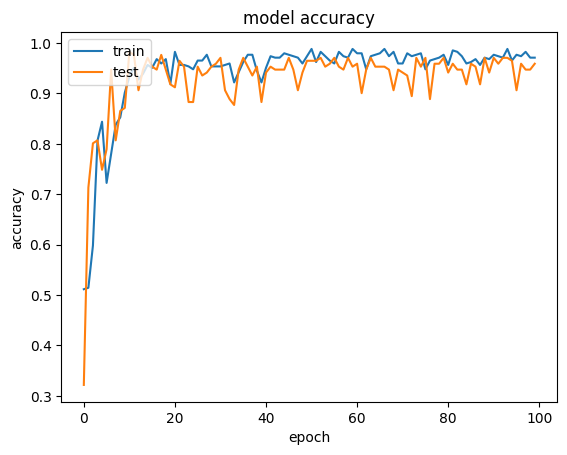

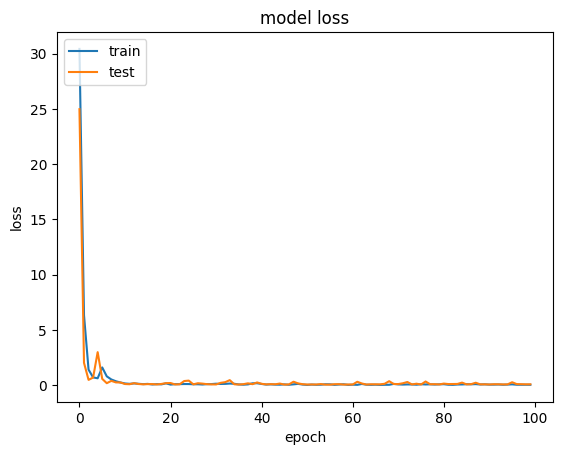

In [ ]:
history =  model.fit(x, y, epochs=100,validation_split=0.33, batch_size=40)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
if 'val_accuracy' in history.history:
  plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()